In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

Missing Values Analysis:
restaurant_id           0
restaurant_name         0
city                    0
cuisine                 0
latitude                0
longitude               0
has_delivery         4047
has_takeaway         5560
has_opening_hours       0
temperature_F           0
precipitation           0
humidity                0
wind_speed              0
dtype: int64


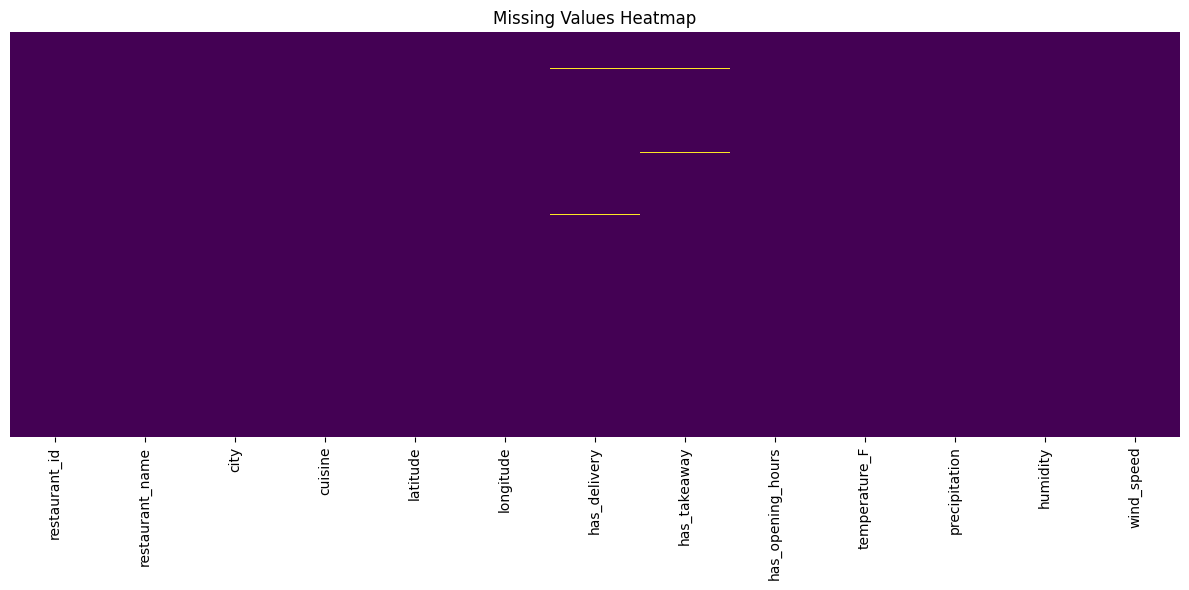


Missing Values per Column:
latitude                0
longitude               0
has_delivery         4047
has_takeaway         5560
has_opening_hours       0
temperature_F           0
precipitation           0
humidity                0
wind_speed              0
dtype: int64

2D PCA Variance Explained:
Individual Component Variance:
[35.92651023 19.46369786]
Total Variance Explained (2D): 55.39%

3D PCA Variance Explained:
Individual Component Variance:
[35.92651023 19.46369786 10.79803981]
Total Variance Explained (3D): 66.19%


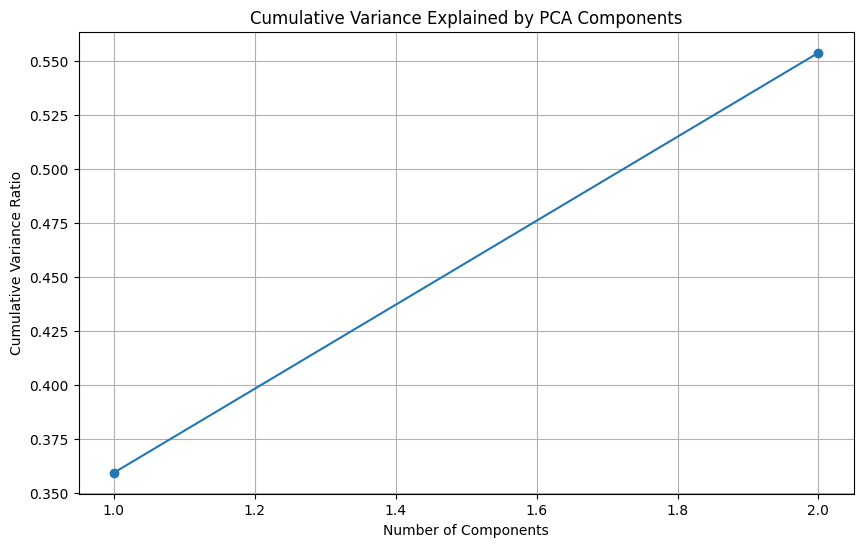

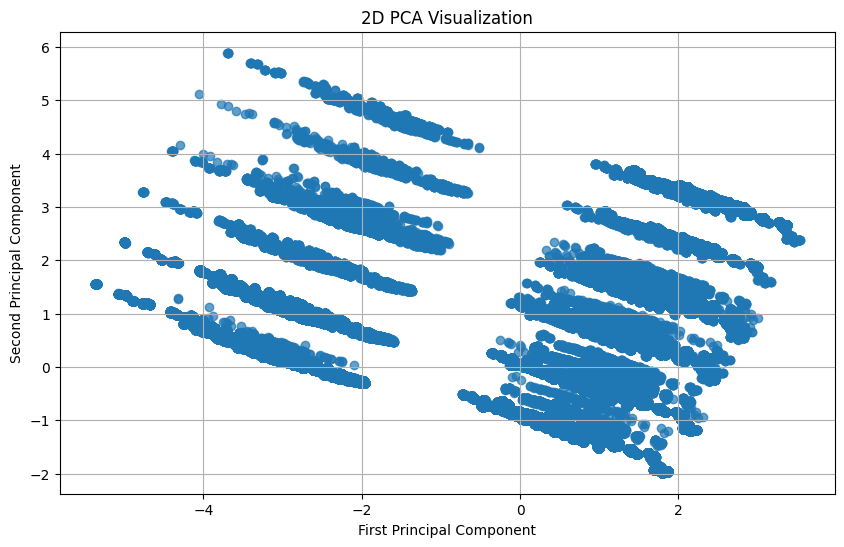

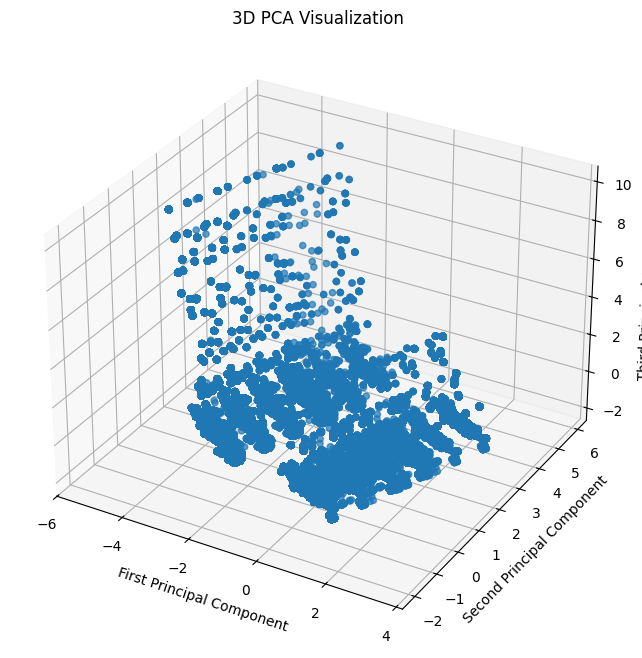


Feature Importance in Principal Components:

Principal Component 1:
latitude: 0.4936
longitude: 0.4791
temperature_F: 0.4693
humidity: 0.3163
wind_speed: 0.2518
has_delivery: 0.2263
has_takeaway: 0.2107
has_opening_hours: 0.1775
precipitation: 0.1265

Principal Component 2:
has_takeaway: 0.6057
has_delivery: 0.5911
has_opening_hours: 0.3835
latitude: 0.2022
temperature_F: 0.1825
wind_speed: 0.1547
humidity: 0.1466
longitude: 0.1006
precipitation: 0.0829

Number of Components for 95% Variance:
2D PCA: 1
3D PCA: 1

Top 3 Eigenvalues:
[3.23338896 1.75173445]


In [3]:
# Comprehensive Data Cleaning and PCA Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Dataset
data = pd.read_csv('C:/grad_sem2/ML/Project/weather_food_delivery/data/master_delivery_data.csv')

# 2. Inspect NaN Values
def analyze_missing_values(df):
    # Check for missing values
    print("Missing Values Analysis:")
    print(df.isnull().sum())
    
    # Visualize missing values
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.tight_layout()
    plt.show()

# 3. Data Cleaning Strategy
def clean_data(df):
    # Select numeric columns
    numeric_columns = ['latitude', 'longitude', 'has_delivery', 'has_takeaway', 
                       'has_opening_hours', 'temperature_F', 'precipitation', 
                       'humidity', 'wind_speed']
    
    # Create a copy of the dataframe
    cleaned_df = df[numeric_columns].copy()
    
    # Detailed Missing Value Analysis
    print("\nMissing Values per Column:")
    print(cleaned_df.isnull().sum())
    
    # Handling Missing Values
    # Option 1: Simple imputation strategies
    
    # Mean Imputation
    cleaned_df = cleaned_df.fillna(cleaned_df.mean())
    
    # Alternative Imputation Strategies (Uncomment to try)
    # Median Imputation
    # cleaned_df = cleaned_df.fillna(cleaned_df.median())
    
    # Most Frequent Value Imputation
    # cleaned_df = cleaned_df.fillna(cleaned_df.mode().iloc[0])
    
    return cleaned_df

# 4. PCA Analysis Function
def perform_pca_analysis(X):
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    
    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Perform PCA
    # 2D PCA
    pca_2d = PCA(n_components=2)
    X_pca_2d = pca_2d.fit_transform(X_scaled)
    
    # 3D PCA
    pca_3d = PCA(n_components=3)
    X_pca_3d = pca_3d.fit_transform(X_scaled)
    
    # Variance Explained Analysis
    print("\n2D PCA Variance Explained:")
    print("Individual Component Variance:")
    print(pca_2d.explained_variance_ratio_ * 100)
    print(f"Total Variance Explained (2D): {sum(pca_2d.explained_variance_ratio_) * 100:.2f}%")
    
    print("\n3D PCA Variance Explained:")
    print("Individual Component Variance:")
    print(pca_3d.explained_variance_ratio_ * 100)
    print(f"Total Variance Explained (3D): {sum(pca_3d.explained_variance_ratio_) * 100:.2f}%")
    
    # Cumulative Variance Plot
    plt.figure(figsize=(10, 6))
    cumulative_variance = np.cumsum(pca_2d.explained_variance_ratio_)
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
    plt.title('Cumulative Variance Explained by PCA Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Variance Ratio')
    plt.grid(True)
    plt.show()
    
    # Visualizations
    # 2D Visualization
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.7)
    plt.title('2D PCA Visualization')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.grid(True)
    plt.show()
    
    # 3D Visualization
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], alpha=0.7)
    ax.set_title('3D PCA Visualization')
    ax.set_xlabel('First Principal Component')
    ax.set_ylabel('Second Principal Component')
    ax.set_zlabel('Third Principal Component')
    plt.show()
    
    # Feature Importance
    feature_names = ['latitude', 'longitude', 'has_delivery', 'has_takeaway', 
                     'has_opening_hours', 'temperature_F', 'precipitation', 
                     'humidity', 'wind_speed']
    
    print("\nFeature Importance in Principal Components:")
    for i, pc in enumerate(pca_2d.components_, 1):
        print(f"\nPrincipal Component {i}:")
        # Sort features by their absolute importance
        feature_importance = sorted(zip(feature_names, np.abs(pc)), key=lambda x: x[1], reverse=True)
        for feature, importance in feature_importance:
            print(f"{feature}: {importance:.4f}")
    
    return pca_2d, pca_3d

# Main Execution
# Step 1: Analyze Missing Values
analyze_missing_values(data)

# Step 2: Clean the Data
cleaned_data = clean_data(data)

# Step 3: Perform PCA Analysis
pca_2d, pca_3d = perform_pca_analysis(cleaned_data)

# Additional Insights
def find_components_for_variance(pca, threshold=0.95):
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    return np.argmax(cumulative_variance >= threshold) + 1

print("\nNumber of Components for 95% Variance:")
print("2D PCA:", find_components_for_variance(pca_2d))
print("3D PCA:", find_components_for_variance(pca_3d))

# Top Eigenvalues
print("\nTop 3 Eigenvalues:")
print(pca_2d.explained_variance_[:3])


--- Delivery Insights ---

Top 15 Rules by Support:
                      antecedents                    consequents   support  \
19                        (Windy)                 (Cold_Weather)  0.817921   
18                 (Cold_Weather)                        (Windy)  0.817921   
50                        (Windy)  (City_New York, Cold_Weather)  0.597112   
47          (Cold_Weather, Windy)                (City_New York)  0.597112   
48                (City_New York)          (Cold_Weather, Windy)  0.597112   
45  (City_New York, Cold_Weather)                        (Windy)  0.597112   
5                 (City_New York)                 (Cold_Weather)  0.597112   
6                  (Cold_Weather)                (City_New York)  0.597112   
46         (City_New York, Windy)                 (Cold_Weather)  0.597112   
10                (City_New York)                        (Windy)  0.597112   
11                        (Windy)                (City_New York)  0.597112   
49         

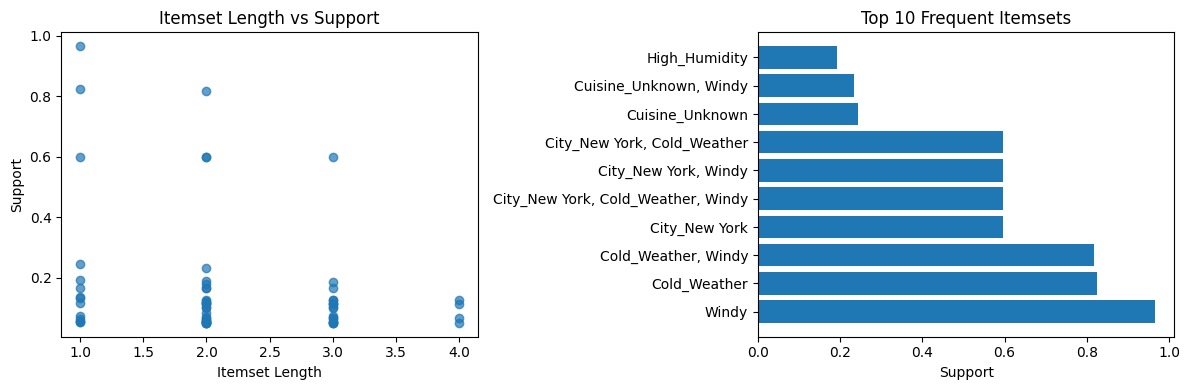

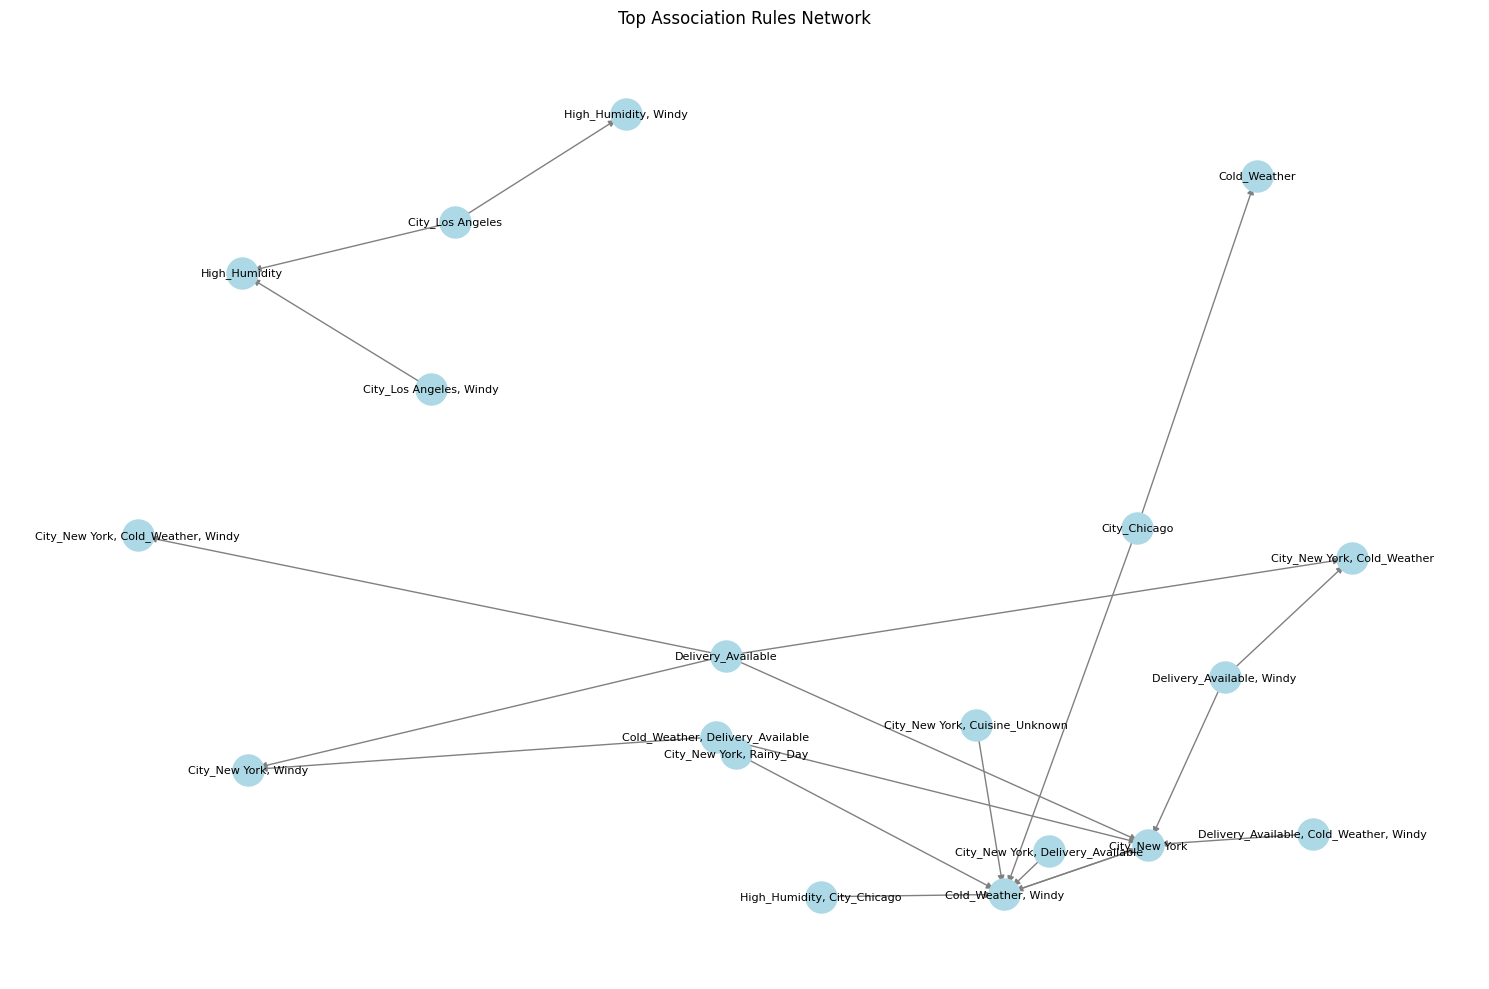

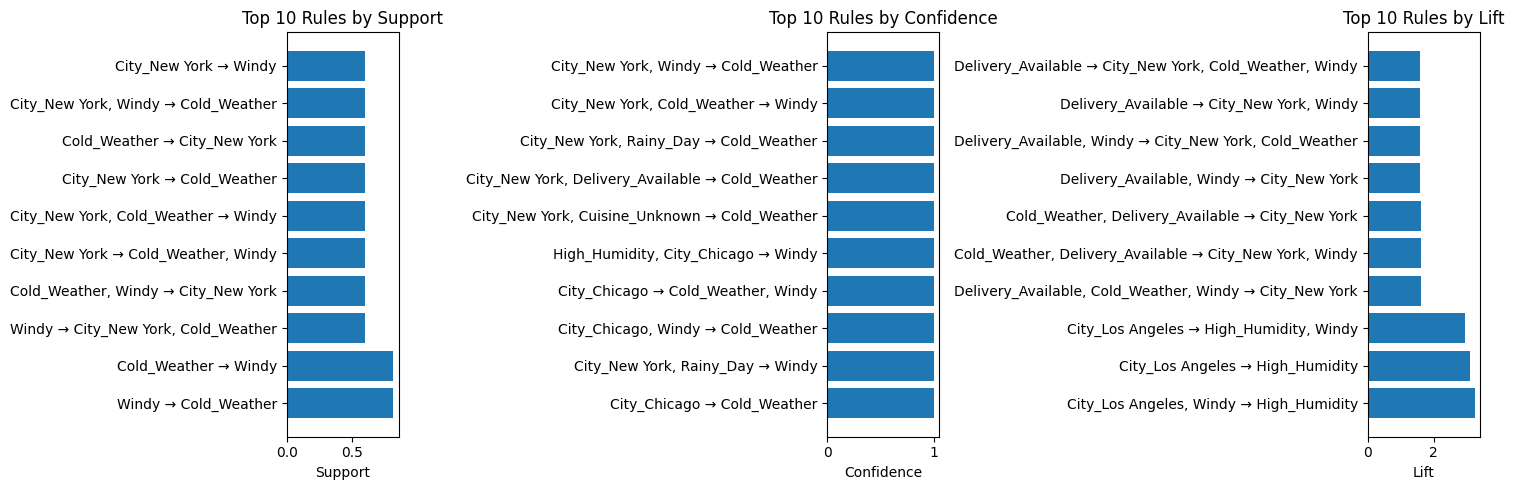

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the master delivery dataset
# Assuming the dataset is loaded as 'df'

def prepare_delivery_transactions(df):
    def create_transactions(row):
        transactions = []
        
        # Weather-related features
        if row['temperature_F'] < 50:
            transactions.append('Cold_Weather')
        elif row['temperature_F'] > 80:
            transactions.append('Hot_Weather')
        
        if row['precipitation'] > 0:
            transactions.append('Rainy_Day')
        
        # Delivery-related features
        if row['has_delivery'] == 1:
            transactions.append('Delivery_Available')
        
        # Cuisine type
        transactions.append(f'Cuisine_{row["cuisine"]}')
        
        # City
        transactions.append(f'City_{row["city"]}')
        
        # Time of day (if applicable)
        # You might need to extract this from a timestamp column
        # For example:
        # if row['order_time'].hour < 12:
        #     transactions.append('Morning_Order')
        # elif 12 <= row['order_time'].hour < 18:
        #     transactions.append('Afternoon_Order')
        # else:
        #     transactions.append('Evening_Order')
        
        # Delivery conditions
        if row['humidity'] > 70:
            transactions.append('High_Humidity')
        
        if row['wind_speed'] > 10:
            transactions.append('Windy')
        
        return transactions

    # Generate transactions
    transactions = df.apply(create_transactions, axis=1).tolist()
    return transactions

def perform_meaningful_arm_analysis(df, min_support=0.05, min_confidence=0.5):
    # Prepare transactions
    transactions = prepare_delivery_transactions(df)
    
    # Transform transactions
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    te_df = pd.DataFrame(te_ary, columns=te.columns_)
    
    # Generate Frequent Itemsets
    frequent_itemsets = apriori(te_df, min_support=min_support, use_colnames=True)
    
    # Generate Association Rules
    rules = association_rules(frequent_itemsets, 
                               metric="confidence", 
                               min_threshold=min_confidence)
    
    # Meaningful Visualizations
    def visualize_arm_insights(frequent_itemsets, rules):
        # 1. Support Distribution
        plt.figure(figsize=(12, 4))
        
        # Itemset Length vs Support
        plt.subplot(121)
        frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
        plt.scatter(frequent_itemsets['length'], frequent_itemsets['support'], alpha=0.7)
        plt.title('Itemset Length vs Support')
        plt.xlabel('Itemset Length')
        plt.ylabel('Support')
        
        # Top Frequent Itemsets
        plt.subplot(122)
        top_itemsets = frequent_itemsets.sort_values('support', ascending=False).head(10)
        plt.barh(range(len(top_itemsets)), top_itemsets['support'])
        plt.yticks(range(len(top_itemsets)), 
                   [', '.join(map(str, x)) for x in top_itemsets['itemsets']])
        plt.title('Top 10 Frequent Itemsets')
        plt.xlabel('Support')
        plt.tight_layout()
        plt.show()
        
        # 2. Rules Network Visualization
        plt.figure(figsize=(15, 10))
        top_rules = rules.sort_values('lift', ascending=False).head(20)
        
        G = nx.DiGraph()
        for _, rule in top_rules.iterrows():
            antecedents = ', '.join(map(str, rule['antecedents']))
            consequents = ', '.join(map(str, rule['consequents']))
            G.add_edge(antecedents, consequents, 
                       weight=rule['lift'], 
                       confidence=rule['confidence'])
        
        pos = nx.spring_layout(G, k=0.5)
        nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
        nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
        nx.draw_networkx_labels(G, pos, font_size=8)
        plt.title("Top Association Rules Network")
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        
        # 3. Detailed Rules Analysis
        plt.figure(figsize=(15, 5))
        metrics = ['support', 'confidence', 'lift']
        for i, metric in enumerate(metrics, 1):
            plt.subplot(1, 3, i)
            top_rules_metric = rules.sort_values(metric, ascending=False).head(10)
            plt.barh(range(10), top_rules_metric[metric])
            plt.yticks(range(10), 
                       [f"{', '.join(map(str, x))} → {', '.join(map(str, y))}" 
                        for x, y in zip(top_rules_metric['antecedents'], 
                                        top_rules_metric['consequents'])])
            plt.title(f'Top 10 Rules by {metric.capitalize()}')
            plt.xlabel(metric.capitalize())
        plt.tight_layout()
        plt.show()
    
    # Print Detailed Insights
    print("\n--- Delivery Insights ---")
    print("\nTop 15 Rules by Support:")
    support_rules = rules.sort_values("support", ascending=False).head(15)
    print(support_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
    
    print("\nTop 15 Rules by Confidence:")
    confidence_rules = rules.sort_values("confidence", ascending=False).head(15)
    print(confidence_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
    
    print("\nTop 15 Rules by Lift:")
    lift_rules = rules.sort_values("lift", ascending=False).head(15)
    print(lift_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
    
    # Visualize insights
    visualize_arm_insights(frequent_itemsets, rules)
    
    return frequent_itemsets, rules

# Execute the analysis
frequent_itemsets, rules = perform_meaningful_arm_analysis(df)


Top 3 K values: [2, 4, 5]


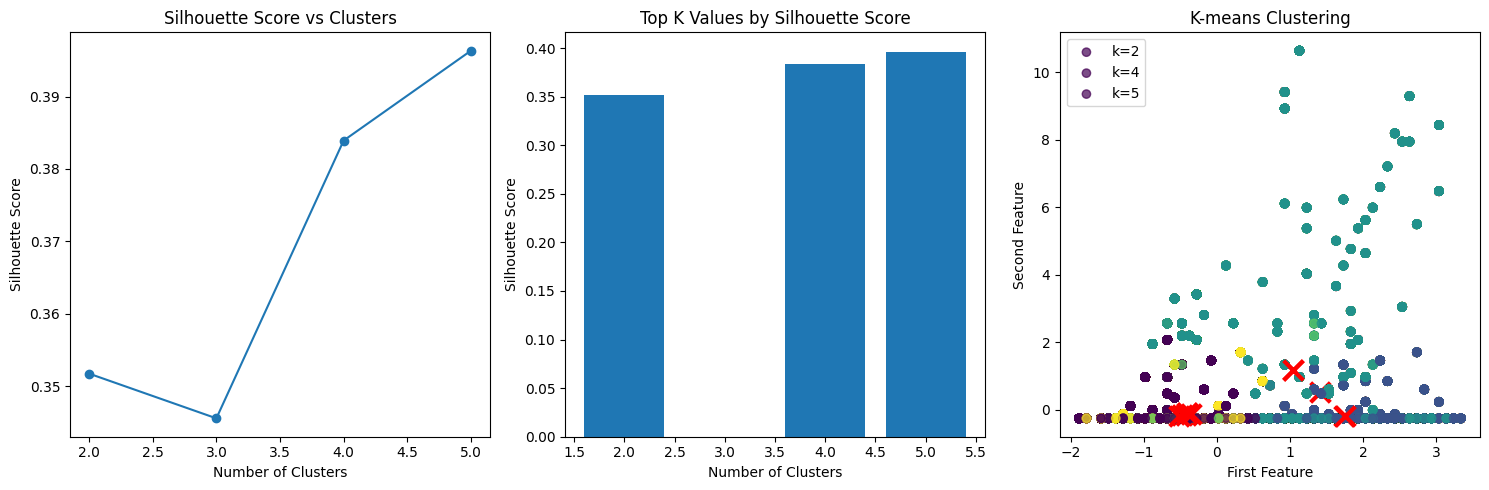

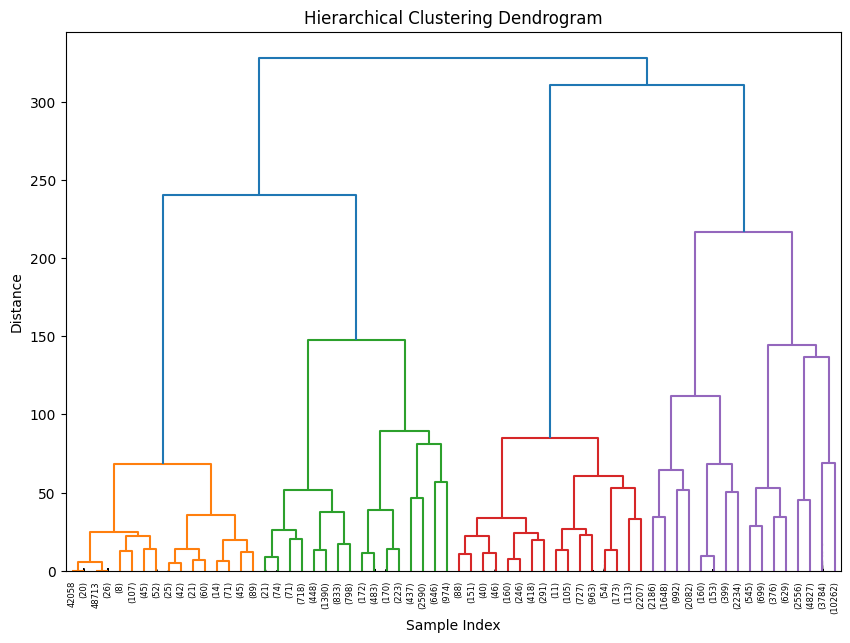

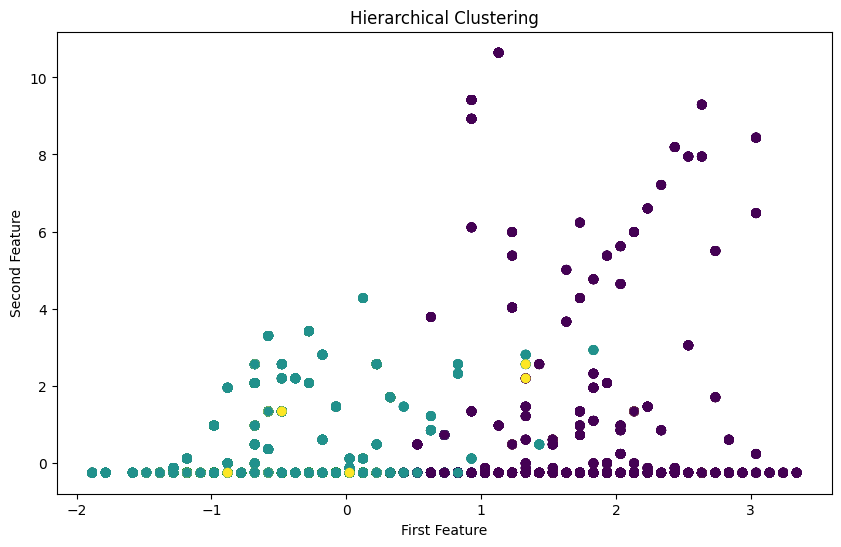

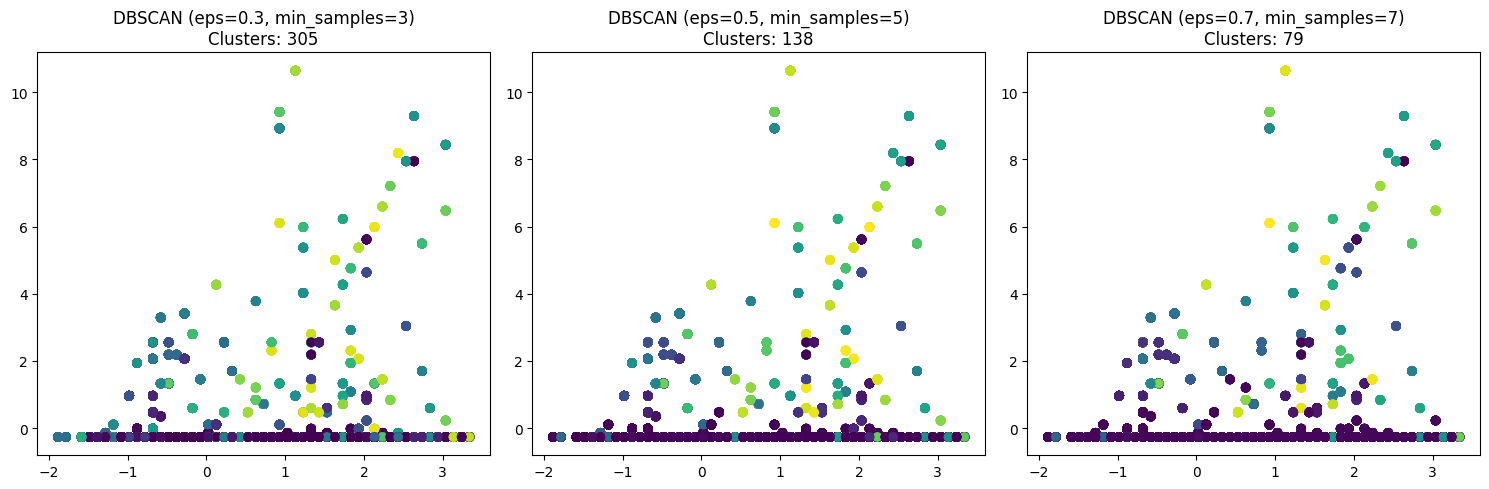

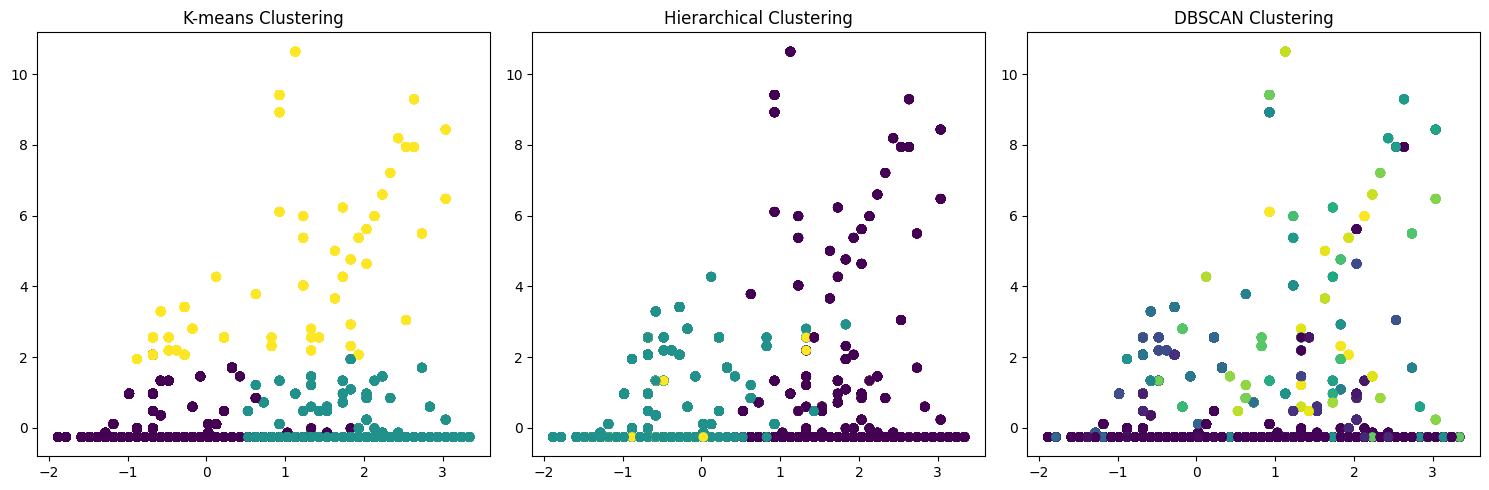

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

def prepare_clustering_data(df, sample_size=50000):
    """
    Prepare data for clustering with efficient sampling
    """
    # Randomly sample the dataset to reduce computational complexity
    df_sample = df.sample(n=min(sample_size, len(df)), random_state=42)
    
    # Select meaningful features
    features = [
        'temperature_F', 
        'precipitation', 
        'humidity', 
        'wind_speed', 
        'has_delivery'
    ]
    
    # Prepare data
    X = df_sample[features].copy()
    
    # Handle missing values
    X.fillna(X.median(), inplace=True)
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X, X_scaled, df_sample

def kmeans_clustering_analysis(X_scaled, X, df_sample):
    """
    Perform K-means clustering with Silhouette method
    """
    plt.figure(figsize=(15, 5))
    
    # Silhouette Scores
    silhouette_scores = []
    k_range = range(2, 6)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(X_scaled)
        sil_score = silhouette_score(X_scaled, cluster_labels)
        silhouette_scores.append(sil_score)
    
    # Plot Silhouette Scores
    plt.subplot(131)
    plt.plot(k_range, silhouette_scores, marker='o')
    plt.title('Silhouette Score vs Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    
    # Find top 3 k values
    top_k_indices = np.argsort(silhouette_scores)[-3:]
    top_k_values = [list(k_range)[i] for i in top_k_indices]
    print("\nTop 3 K values:", top_k_values)
    
    # Clustering plots for top k values
    plt.subplot(132)
    plt.bar(top_k_values, [silhouette_scores[k-2] for k in top_k_values])
    plt.title('Top K Values by Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    
    # Detailed clustering visualization
    plt.subplot(133)
    colors = ['blue', 'green', 'red']
    for i, k in enumerate(top_k_values):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(X_scaled)
        
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 
                    c=cluster_labels, 
                    cmap=f'viridis', 
                    alpha=0.7, 
                    label=f'k={k}')
        
        # Plot centroids
        centroids = kmeans.cluster_centers_
        plt.scatter(centroids[:, 0], centroids[:, 1], 
                    c='red', marker='x', s=200, linewidths=3)
    
    plt.title('K-means Clustering')
    plt.xlabel('First Feature')
    plt.ylabel('Second Feature')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return top_k_values

def hierarchical_clustering_analysis(X_scaled):
    """
    Perform Hierarchical Clustering and create Dendrogram
    """
    plt.figure(figsize=(10, 7))
    
    # Perform hierarchical clustering
    linkage_matrix = linkage(X_scaled, method='ward')
    
    # Plot dendrogram
    dendrogram(linkage_matrix, 
               truncate_mode='level', 
               p=5,  # show only the last p merged clusters
               show_contracted=True)
    
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()
    
    # Perform clustering with 3 clusters for comparison
    hierarchical = AgglomerativeClustering(n_clusters=3)
    hierarchical_labels = hierarchical.fit_predict(X_scaled)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 
                c=hierarchical_labels, 
                cmap='viridis')
    plt.title('Hierarchical Clustering')
    plt.xlabel('First Feature')
    plt.ylabel('Second Feature')
    plt.show()
    
    return hierarchical_labels

def dbscan_clustering_analysis(X_scaled):
    """
    Perform DBSCAN Clustering
    """
    # Try different eps values
    eps_values = [0.3, 0.5, 0.7]
    min_samples_values = [3, 5, 7]
    
    plt.figure(figsize=(15, 5))
    
    for i, (eps, min_samples) in enumerate(zip(eps_values, min_samples_values), 1):
        plt.subplot(1, 3, i)
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)
        
        # Count number of clusters (excluding noise points)
        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 
                    c=dbscan_labels, 
                    cmap='viridis')
        plt.title(f'DBSCAN (eps={eps}, min_samples={min_samples})\nClusters: {n_clusters}')
    
    plt.tight_layout()
    plt.show()
    
    # Choose best DBSCAN configuration
    best_dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = best_dbscan.fit_predict(X_scaled)
    
    return dbscan_labels

def main_clustering_analysis(df):
    """
    Main function to perform comprehensive clustering analysis
    """
    # Prepare data
    X, X_scaled, df_sample = prepare_clustering_data(df)
    
    # K-means Clustering
    kmeans_top_k = kmeans_clustering_analysis(X_scaled, X, df_sample)
    
    # Hierarchical Clustering
    hierarchical_labels = hierarchical_clustering_analysis(X_scaled)
    
    # DBSCAN Clustering
    dbscan_labels = dbscan_clustering_analysis(X_scaled)
    
    # Comparative Analysis
    plt.figure(figsize=(15, 5))
    clustering_methods = [
        ('K-means', KMeans(n_clusters=3, random_state=42).fit_predict(X_scaled)),
        ('Hierarchical', hierarchical_labels),
        ('DBSCAN', dbscan_labels)
    ]
    
    for i, (name, labels) in enumerate(clustering_methods, 1):
        plt.subplot(1, 3, i)
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
        plt.title(f'{name} Clustering')
    
    plt.tight_layout()
    plt.show()

# Run the analysis
main_clustering_analysis(df)